In [17]:
# Eri Osta
# ads829

## Lab 2A

<em>Lab 2 consists of two exercises. This is the first of two exercises in Lab 2, which will cover ``` numpy```  arrays, linear algebra, ```DataFrame```s, and Seaborn. Be sure to watch the video on connecting to the Yahoo finance module, which will be used to get a ```DataFrame``` with data for us before starting.  </em>

### Your Portfolio

Assume you have the following portfolio of stocks including the number of shares (the quantity) of each stock. You will write a program that will determine the best day in the month of May 2021 to buy or sell the portfolio based on the closing price of the day.

| Currency    | Symbol | Quantity |
| ------------|--------|--------- |
| Apple       | AAPL   | 20       |
| Beyond Meat | BYND   | 30       |
| Chevron     | CVX    | 40       |
| GameStop    | GME    | 50       |
| Moderna     | MRNA   | 60       |

The best day to buy the stocks is when the total closing prices for the portfolio is at the lowest. The best day to sell the stocks is when the toal closing prices for the portfolio is at the highest. Also, assume that you have to buy all or sell all on the same day.  You will use the Yahoo Finance module to assist you in the project. 

### About Yahoo Finance Module

The Yahoo Finance Module (```yfinance```) gives you access to real-time and historical stock data. To use the Yahoo finance module, you first need to install it. To install the Yahoo Finance Module, run the following command:

```
pip install yfinance
```

After you have installed the module, you will need to import it into the program. 

```
import yfinance as yf
```

Access the functions through ```yf```. You will only be using the ```download()``` function to get the prices for a given stock during a given time span. Remember that The first line is done for you below.

### Tasks

You will do the following
1. The starter code has been created for you. Specifically, there is an example of how you will access historical stock data from Yahoo Finance module. Adapt and use this sample code to get the required data for the stocks above. The stock symbols are provided above, which is needed for the ```tickers``` parameter.
2. Create a 2D NumPy array which represent the number of shares per stock. Then use the dot product, to find the value of the entire portfolio for each day in May. Create a data frame with the dates and the portfolio values.
3. Create a lineplot using seaborn that plots the prices for each stock. The x axis are the days (they can just be days numbered 0 through 20). The y axis is the price of the stocks. HINT: use the ```pd.melt()``` function to reconfigure the ```DataFrame``` so you can plot multiple lines using the ```hue``` parameter in the ```lineplot()``` function. After calling ```pd.melt()```, name the value column ```'Price'``` and the variable (column) name ```'Stock'```.
4. Answer the questions below.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import yfinance as yf
import pandas as pd
import datetime

a2D = np.array([[20],[30],[40],[50],[60]])

stocks = ['AAPL', 'BYND', 'CVX', 'GME', 'MRNA']

price_data = yf.download(
    tickers=stocks, 
    start='2020-05-01', end='2020-05-30', 
    interval='1d' )[ 'Close' ] 

for i, row in price_data.iterrows():
    i = datetime.date(i.year, i.month, i.day)
    print(f"Total earnings on %s: USD %s" %
            (i, np.dot(row[stocks].to_numpy(), a2D)[0]))

[*********************100%***********************]  5 of 5 completed
Total earnings on 2020-05-01: USD 10720.275118350983
Total earnings on 2020-05-04: USD 11076.700226068497
Total earnings on 2020-05-05: USD 11235.97508072853
Total earnings on 2020-05-06: USD 11890.075162649155
Total earnings on 2020-05-07: USD 12156.374952793121
Total earnings on 2020-05-08: USD 12991.999908685684
Total earnings on 2020-05-11: USD 13307.950472831726
Total earnings on 2020-05-12: USD 13106.699645519257
Total earnings on 2020-05-13: USD 13084.974701404572
Total earnings on 2020-05-14: USD 13137.22512960434
Total earnings on 2020-05-15: USD 13183.900357484818
Total earnings on 2020-05-18: USD 14034.950041770935
Total earnings on 2020-05-19: USD 13592.199982404709
Total earnings on 2020-05-20: USD 13994.725126028061
Total earnings on 2020-05-21: USD 13487.650269269943
Total earnings on 2020-05-22: USD 13501.90011382103
Total earnings on 2020-05-26: USD 12819.599976539612
Total earnings on 2020-05-27: USD

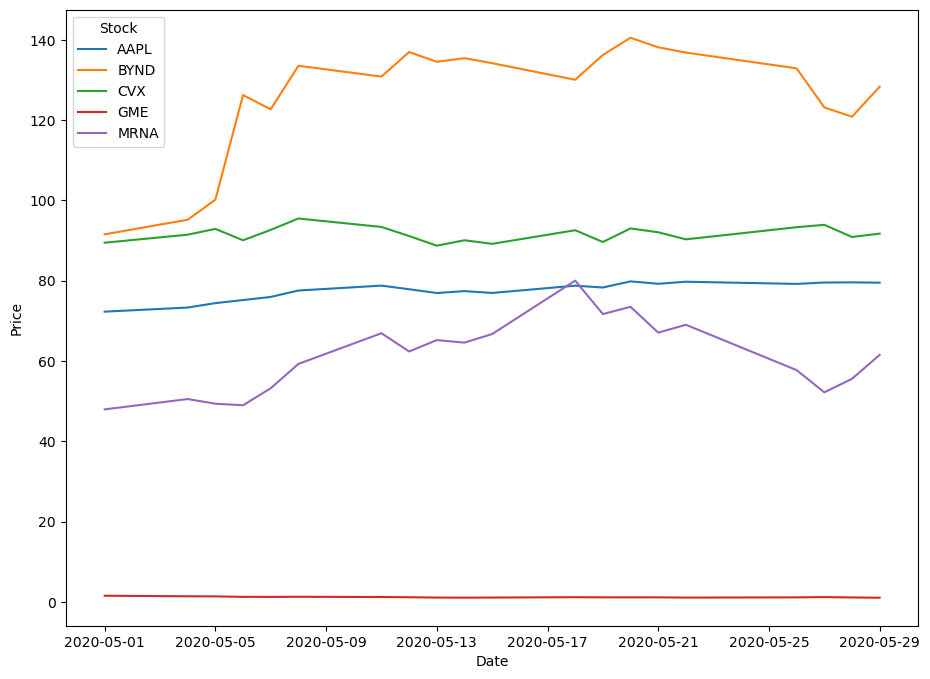

In [19]:
price_data_melt = pd.melt(price_data, value_vars=['AAPL','BYND','CVX','GME','MRNA'],ignore_index=False)
price_data_melt.rename(columns={'value':'Price','variable':'Stock'},inplace=True)

fig = plt.figure( figsize=(11,8) )
sns.lineplot(data=price_data_melt, x=price_data_melt.index,y="Price", hue="Stock")
plt.show()

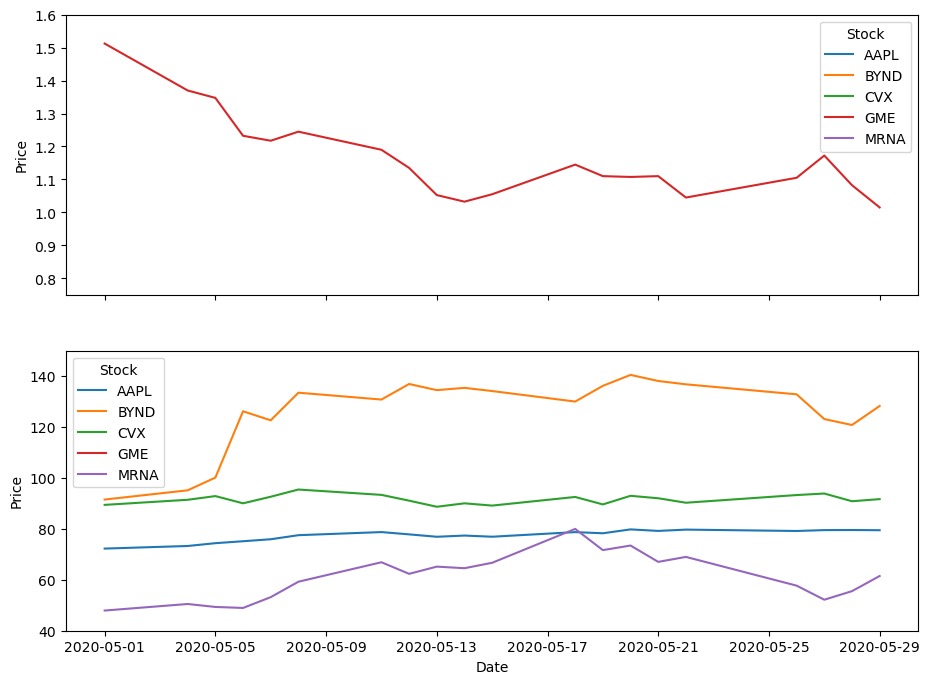

In [29]:
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, sharex=True,figsize=(11,8))
sns.lineplot(data=price_data_melt, x=price_data_melt.index,y="Price", hue="Stock", ax=ax1)
sns.lineplot(data=price_data_melt, x=price_data_melt.index,y="Price", hue="Stock", ax=ax2)
ax2.set_ylim(40, 150)
ax1.set_ylim(0.75, 1.6)
plt.show()

### Questions

Answer the following questions:

1. Given the quantities of each stock listed above, which is the best day to BUY those stocks? That is, which day was the cheapest to buy those stocks? How much will it cost to make all the purchases in that portfolio on that day? 

2. Given the quantities of each stock list above, which is the best day to SELL those stocks? That is, which day did the portfolio have the highest total values? How much will we get if we sold all the stocks in that portfolio on that day?

3. Select one of the stocks that had some sizeable movements in prices. Briefly describe what happened with that company that caused those movements. 

### Answers
1. On May 01, 2020; approx. USD 301
2. Between May 18-20, 2020; approx. USD 397
3. MRNA--vaccine development during COVID-19 pandemic peak in 2020. 

In [31]:
stocks = ['AAPL', 'BYND', 'CVX', 'GME', 'MRNA']
cost_buy = []
cost_sell = []
for col in stocks:
    for i, row in price_data.iterrows():
        max = np.max(price_data[col])
        min = np.min(price_data[col])
        diff = max - min
        min_date = price_data.index[(price_data[col] == min)]
        min_date = min_date.format(formatter=lambda x: x.strftime('%Y/%m/%d'))[0]
        max_date = price_data.index[(price_data[col] == max)]
        max_date = max_date.format(formatter=lambda x: x.strftime('%Y/%m/%d'))[0]
    cost_buy.append(min)
    cost_sell.append(max)
    print(f" ## BUY ## Stock: %s, Min: %s, Min Date: %s, Diff: %s" % (col, min, min_date, diff))
    print(f" ## SELL ## Stock: %s, Max: %s, Max Date: %s, Diff: %s" % (col, max, max_date, diff))
cost_buy = sum(cost_buy)
cost_sell = sum(cost_sell)
print("## BUY ## Approximate USD:",cost_buy)
print("## SELL ## Approximate USD:",cost_sell)

 ## BUY ## Stock: AAPL, Min: 72.26750183105469, Min Date: 2020/05/01, Diff: 7.540000915527344
 ## SELL ## Stock: AAPL, Max: 79.80750274658203, Max Date: 2020/05/20, Diff: 7.540000915527344
 ## BUY ## Stock: BYND, Min: 91.52999877929688, Min Date: 2020/05/01, Diff: 48.970001220703125
 ## SELL ## Stock: BYND, Max: 140.5, Max Date: 2020/05/20, Diff: 48.970001220703125
 ## BUY ## Stock: CVX, Min: 88.69999694824219, Min Date: 2020/05/13, Diff: 6.7700042724609375
 ## SELL ## Stock: CVX, Max: 95.47000122070312, Max Date: 2020/05/08, Diff: 6.7700042724609375
 ## BUY ## Stock: GME, Min: 1.0149999856948853, Min Date: 2020/05/29, Diff: 0.49750006198883057
 ## SELL ## Stock: GME, Max: 1.5125000476837158, Max Date: 2020/05/01, Diff: 0.49750006198883057
 ## BUY ## Stock: MRNA, Min: 47.93000030517578, Min Date: 2020/05/01, Diff: 32.06999969482422
 ## SELL ## Stock: MRNA, Max: 80.0, Max Date: 2020/05/18, Diff: 32.06999969482422
## BUY ## Approximate USD: 301.4424978494644
## SELL ## Approximate USD: 3